In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
x = tf.placeholder(tf.float32, [None,1],name='x')
y = tf.placeholder(tf.float32, [None,1],name='y')
W = tf.Variable([5.0], tf.float32)
linear_model=tf.multiply(W,x)

In [3]:
x_arr=np.array([1,2,3,4,5])
y_arr=np.array([4,8,12,16,20])
x_arr=x_arr.reshape(5,1)
y_arr=y_arr.reshape(5,1)

In [4]:
loss = tf.reduce_sum(tf.sqrt(tf.square(tf.subtract(linear_model,y))))/5
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [5]:
sess = tf.Session()
sess.run(init)

In [6]:
weight_plot=[]
for i in range(500):
    _,loss_val,W_val=sess.run([train , loss , W], feed_dict = {x: x_arr, y: y_arr})
    weight_plot.append([i,loss_val,W_val])            

In [7]:
x_pred_temp=np.array([6,7,8,9,10])
x_pred=x_pred_temp.reshape(5,1)
y_pred = sess.run(linear_model, feed_dict={x:x_pred})

In [8]:
sess.close()

In [9]:
x_arr=np.array([1,2,3,4,5])
y_arr=np.array([4,8,12,16,20])
result_final=float(weight_plot[len(weight_plot)-1][2])

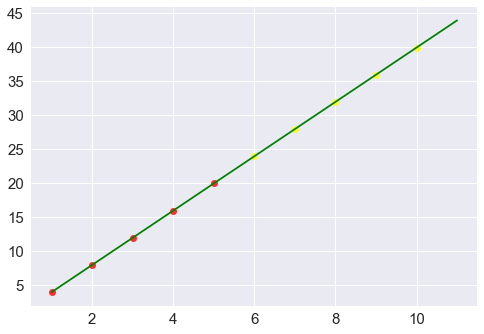

In [10]:
sns.set(style="darkgrid", font_scale=1.5)
func = np.arange(1.0, 11.1,0.1)
x_arr=np.array([1,2,3,4,5])
y_arr=np.array([4,8,12,16,20])
pred_x = sns.regplot(x_arr, y_arr,fit_reg=False,color="red");
ax = sns.regplot(x_pred_temp, y_pred,fit_reg=False,color="yellow");
plt.plot (func, func*result_final ,color="green")
plt.show()

In [11]:
sess.close()

In [12]:
iteration=[]
losses=[]
weights=[]
for i in range(len(weight_plot)):
    iteration.append(weight_plot[i][0])
    losses.append(weight_plot[i][1])
    weights.append(weight_plot[i][2])

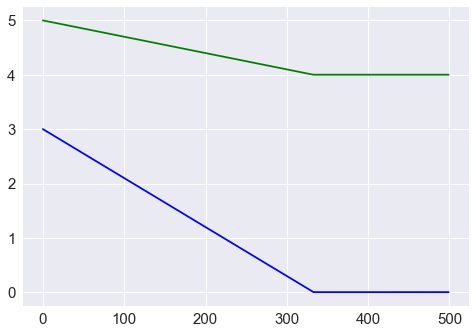

In [13]:
sns.set(style="darkgrid", font_scale=1.5)
plt.plot (iteration, weights ,color="green")
plt.plot (iteration, losses ,color="blue")
plt.show()
